# 1. SETUP AND INSTALLATION

In [1]:
!pip install ultralytics pycocotools -q
print("✅ Libraries installed successfully.")


import os
import yaml
import torch
import glob
import cv2
import math
import matplotlib.pyplot as plt
from ultralytics import YOLO
from IPython.display import Image, display

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.0 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.0 MB/s eta 0:00:00:00:0100:01
✅ Libraries installed s

In [2]:
print("\nPyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("Using device:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("CUDA not available, using CPU. This will be very slow.")


PyTorch version: 2.6.0+cu124
CUDA available: True
Using device: Tesla T4


In [3]:
dataset_base_path = '/kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8'
config_path = './brain_tumor_data.yaml'

data_config = {
    'path': dataset_base_path,
    'train': 'train/images',
    'val': 'valid/images',
    'test': 'test/images',
    'names': { 0: 'glioma', 1: 'meningioma', 2: 'pituitary' }
}

with open(config_path, 'w') as f:
    yaml.dump(data_config, f, default_flow_style=None)
print("\nDataset configuration file created at:", config_path)


Dataset configuration file created at: ./brain_tumor_data.yaml


In [5]:
# Load the pre-trained YOLOv8n model, which is our best-performing baseline (YOLOv11).
model = YOLO('yolov8n.pt')

print("\n🚀 Starting training for Custom Model A...")

# CHANGE 1: Advanced Learning Rate Scheduler switch from default scheduler to 'CosineAnnealingLR'
# adjusts the learning rate in a cosine wave pattern. This can help the model converge more smoothly to a good solution
use_cosine_scheduler = True

# CHANGE 2: increasing the probability of translation, scaling, and adding mosaic augmentation,
# which combines four images into one, forcing the model to learn object detection in a variety of contexts.
translate_aug = 0.2  # Default is 0.1
scale_aug = 0.6      # Default is 0.5
mosaic_aug = 1.0     # Default is 1.0

# CHANGE 3: Modified Loss Function Weights
# adjusting double the weight of the classification loss to prioritize getting the class right.
class_loss_weight = 1.0 #  default of 0.5

results = model.train(
    data=config_path,
    epochs=20, 
    imgsz=640,
    batch=-1,
    device=0,
    project='custom_model_A_training',
    name='yolov11_custom_A',

    cos_lr=use_cosine_scheduler,
    translate=translate_aug,
    scale=scale_aug,
    mosaic=mosaic_aug,
    cls=class_loss_weight
)



🚀 Starting training for Custom Model A...
Ultralytics 8.3.189 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=1.0, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=./brain_tumor_data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov11_custom_A, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, persp

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        612        612      0.913      0.846      0.918      0.708
                glioma        285        285       0.86      0.656      0.815       0.54
            meningioma        142        142      0.971      0.958      0.982      0.837
             pituitary        185        185      0.906      0.924      0.957      0.748
Speed: 0.2ms preprocess, 2.9ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to custom_model_A_training/yolov11_custom_A


In [6]:
print("\nStarting validation for Custom Model A...")
val_results = model.val(
    split='test',
    project='custom_model_A_validation',
    name='test_results'
)


Starting validation for Custom Model A...
Ultralytics 8.3.189 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 6.3±1.3 MB/s, size: 31.1 KB)
val: Scanning /kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8/test/labels... 308 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 308/308 202.6it/s 1.5s
WARNING ⚠️ val: Cache directory /kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8/test is not writeable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 6/6 1.1it/s 5.3ss


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        308        308      0.872      0.859      0.897      0.678
                glioma        159        159      0.721      0.682      0.741      0.489
            meningioma         62         62      0.952      0.963      0.977      0.827
             pituitary         87         87      0.942      0.931      0.973      0.718
Speed: 3.3ms preprocess, 4.0ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to custom_model_A_validation/test_results



Displaying results from: custom_model_A_training/yolov11_custom_A ---

Training & Validation Metrics (Loss, mAP, etc.)


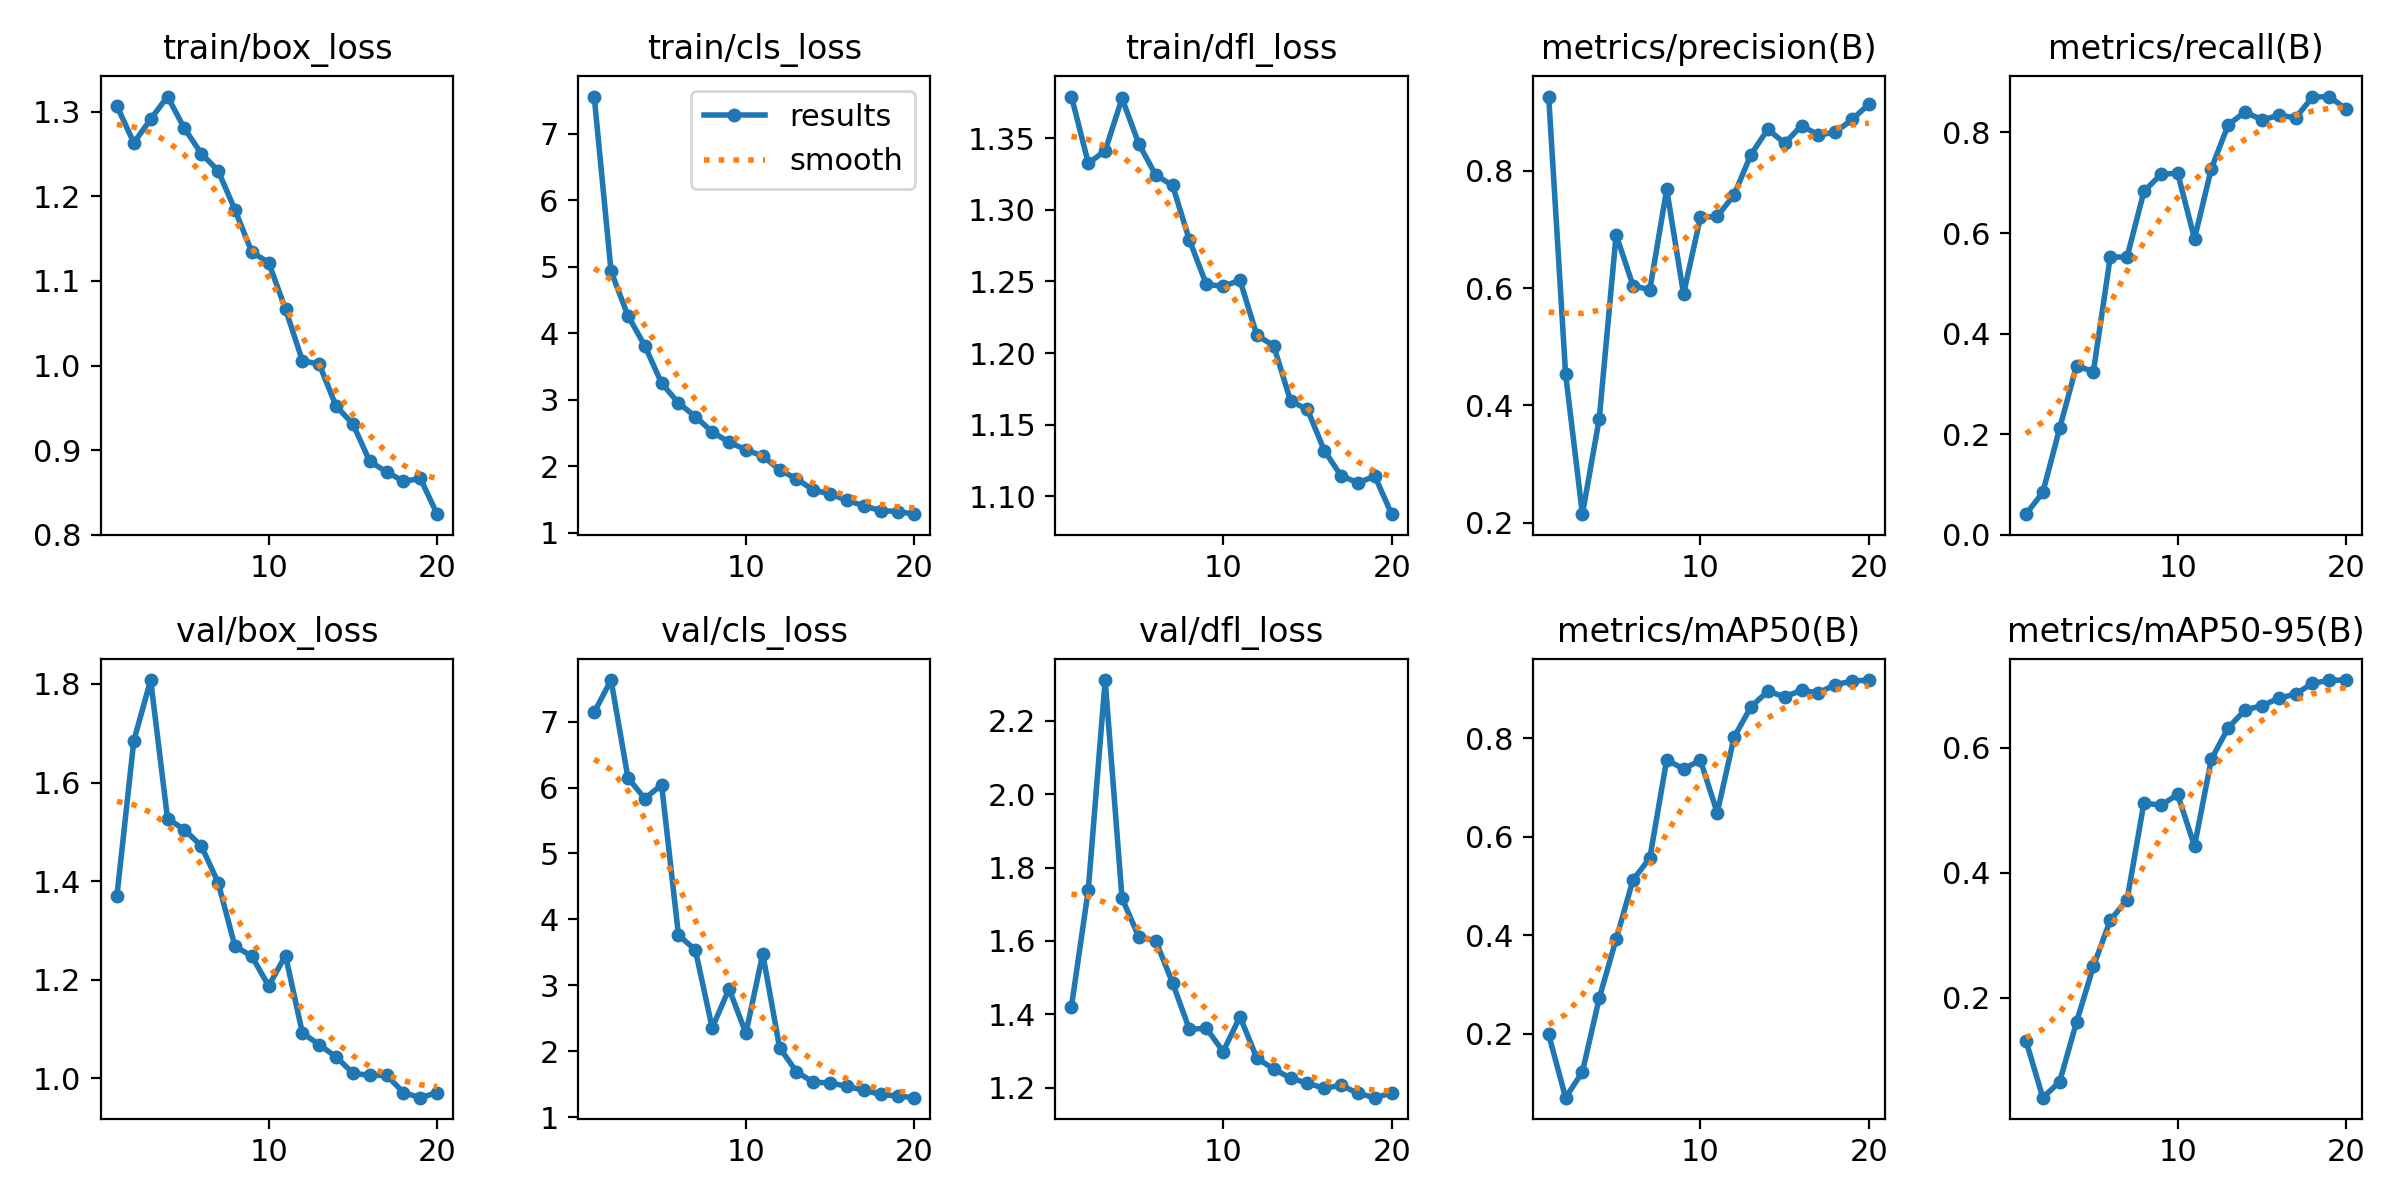

In [10]:
results_dir = results.save_dir
print(f"\nDisplaying results from: {results_dir} ---")

# 6.1 Training & Validation Metrics
results_plot_path = os.path.join(results_dir, 'results.png')
if os.path.exists(results_plot_path):
    print("\nTraining & Validation Metrics (Loss, mAP, etc.)")
    display(Image(filename=results_plot_path, width=1200))



Confusion Matrix


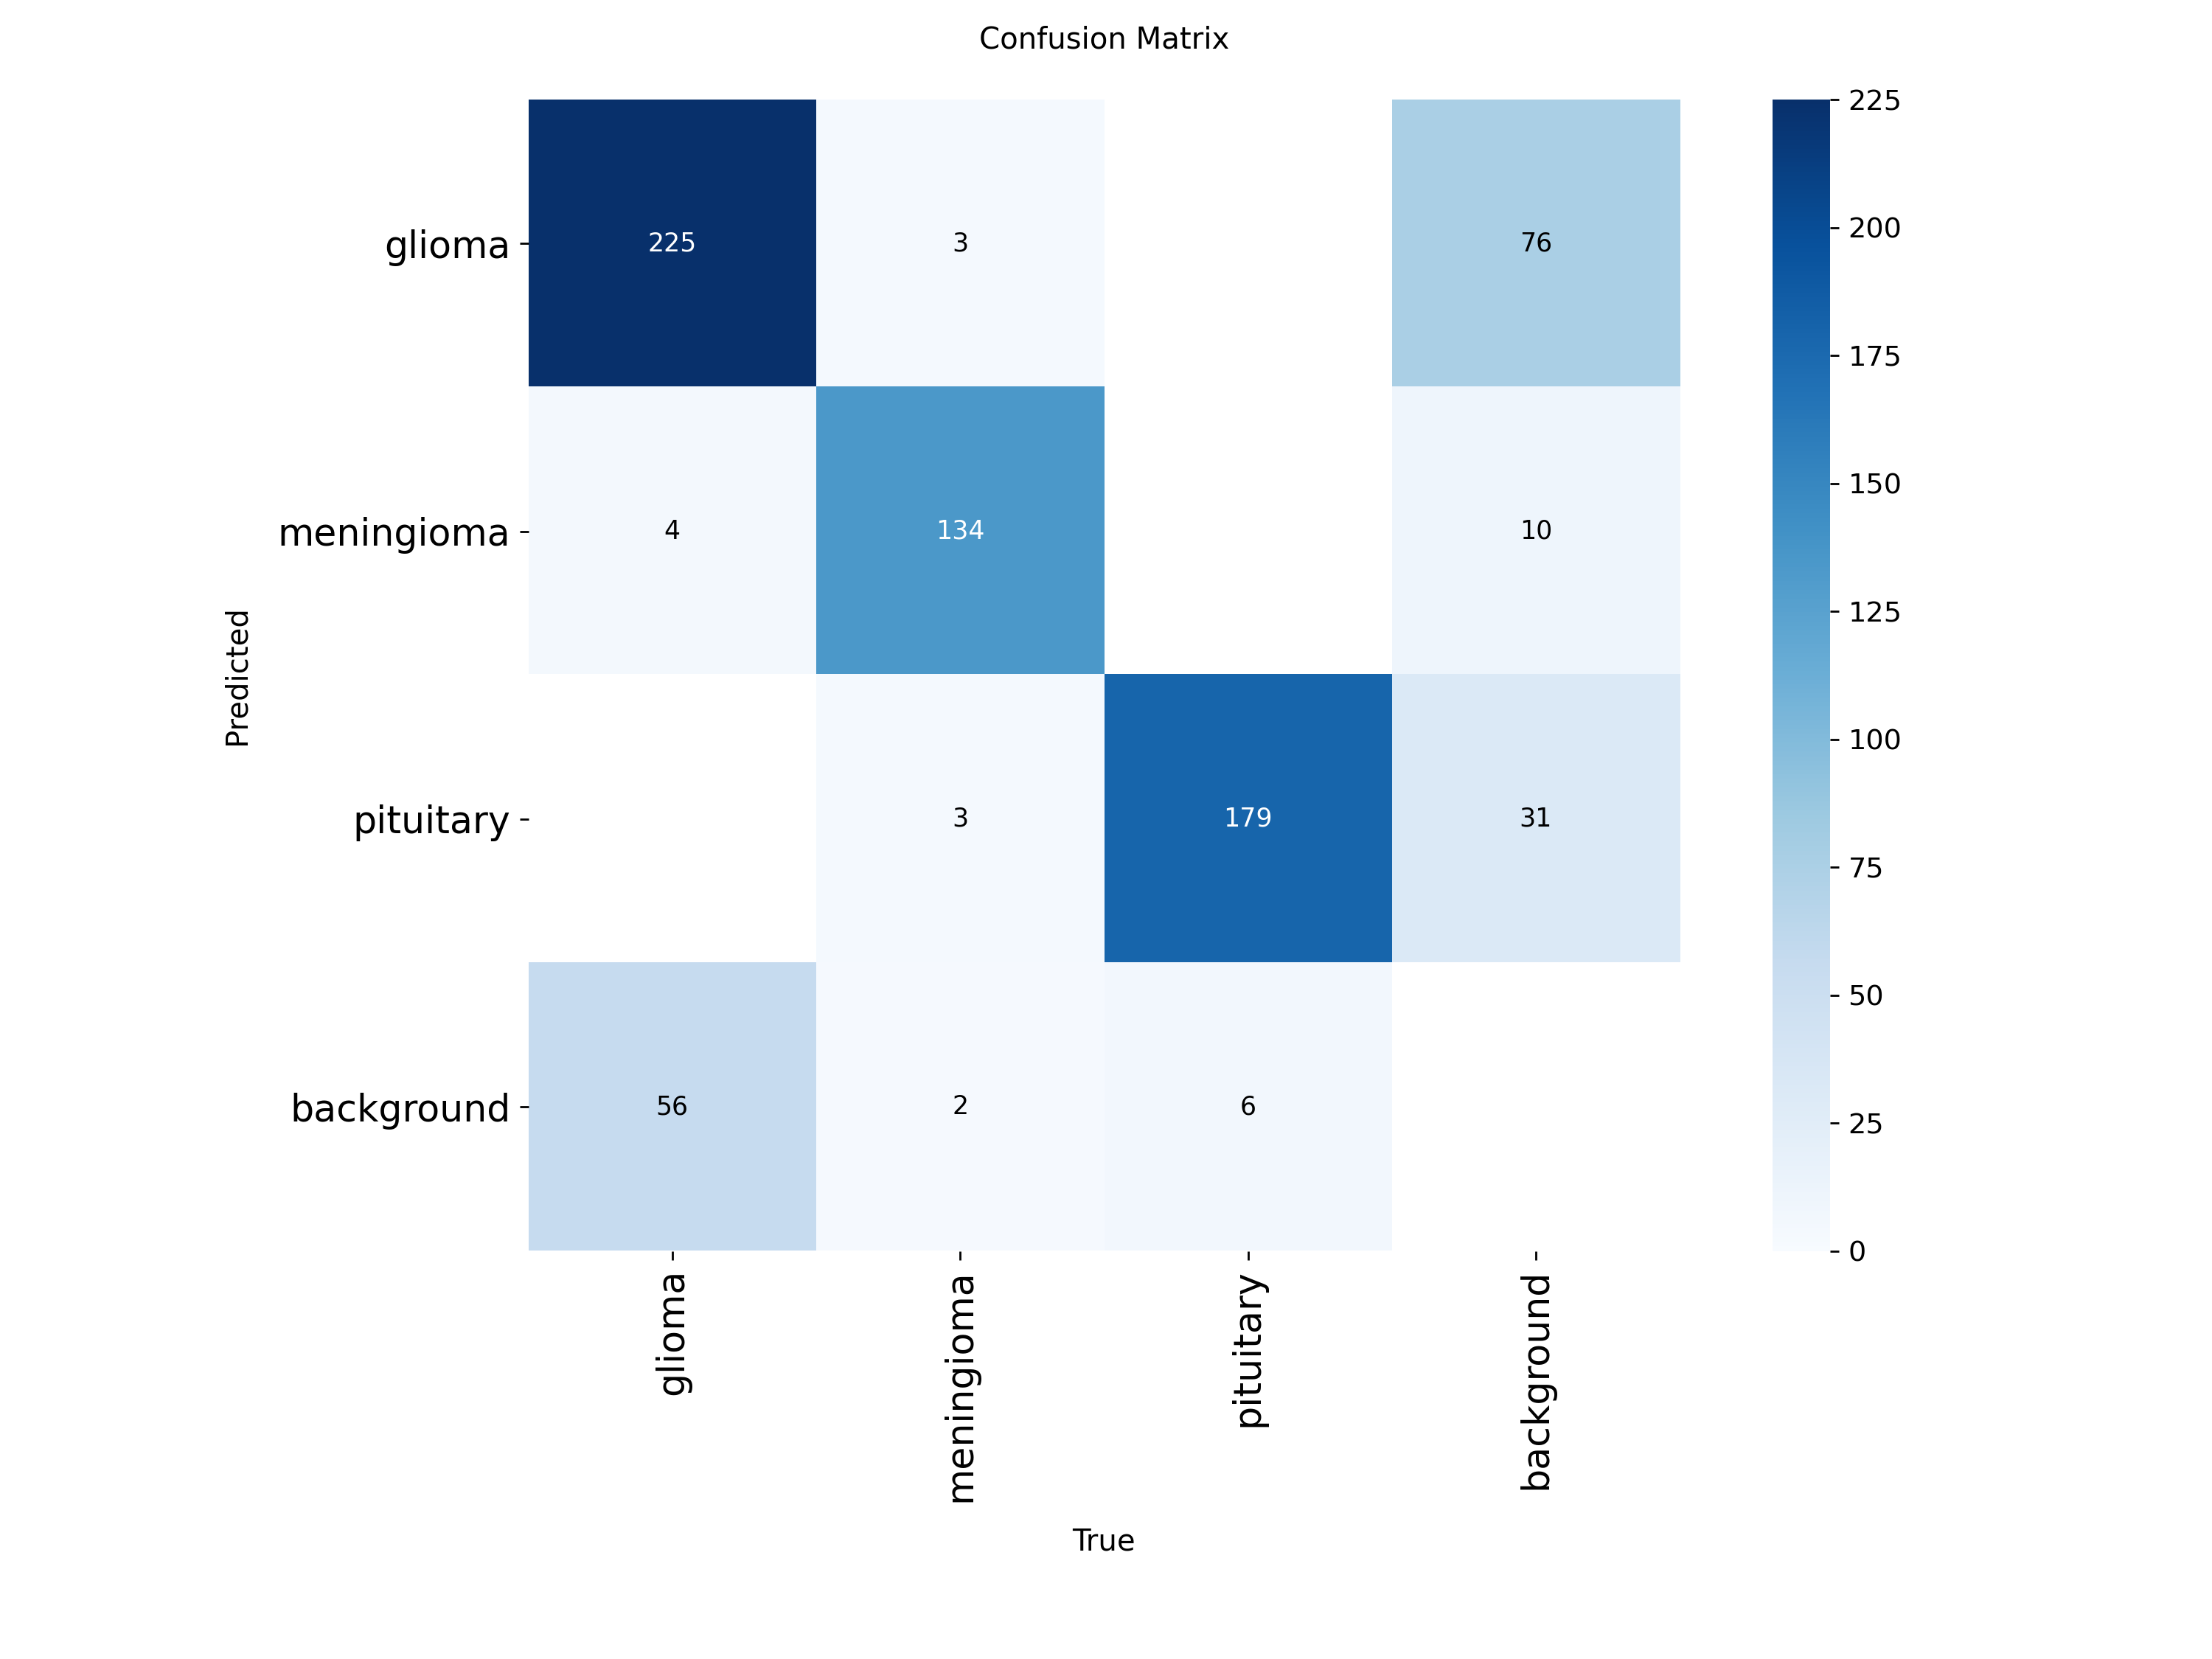

In [12]:
# 6.2 Confusion Matrix
confusion_matrix_path = os.path.join(results_dir, 'confusion_matrix.png')
if os.path.exists(confusion_matrix_path):
    print("\nConfusion Matrix")
    display(Image(filename=confusion_matrix_path, width=1000))


📈 Precision-Recall (PR) Curve


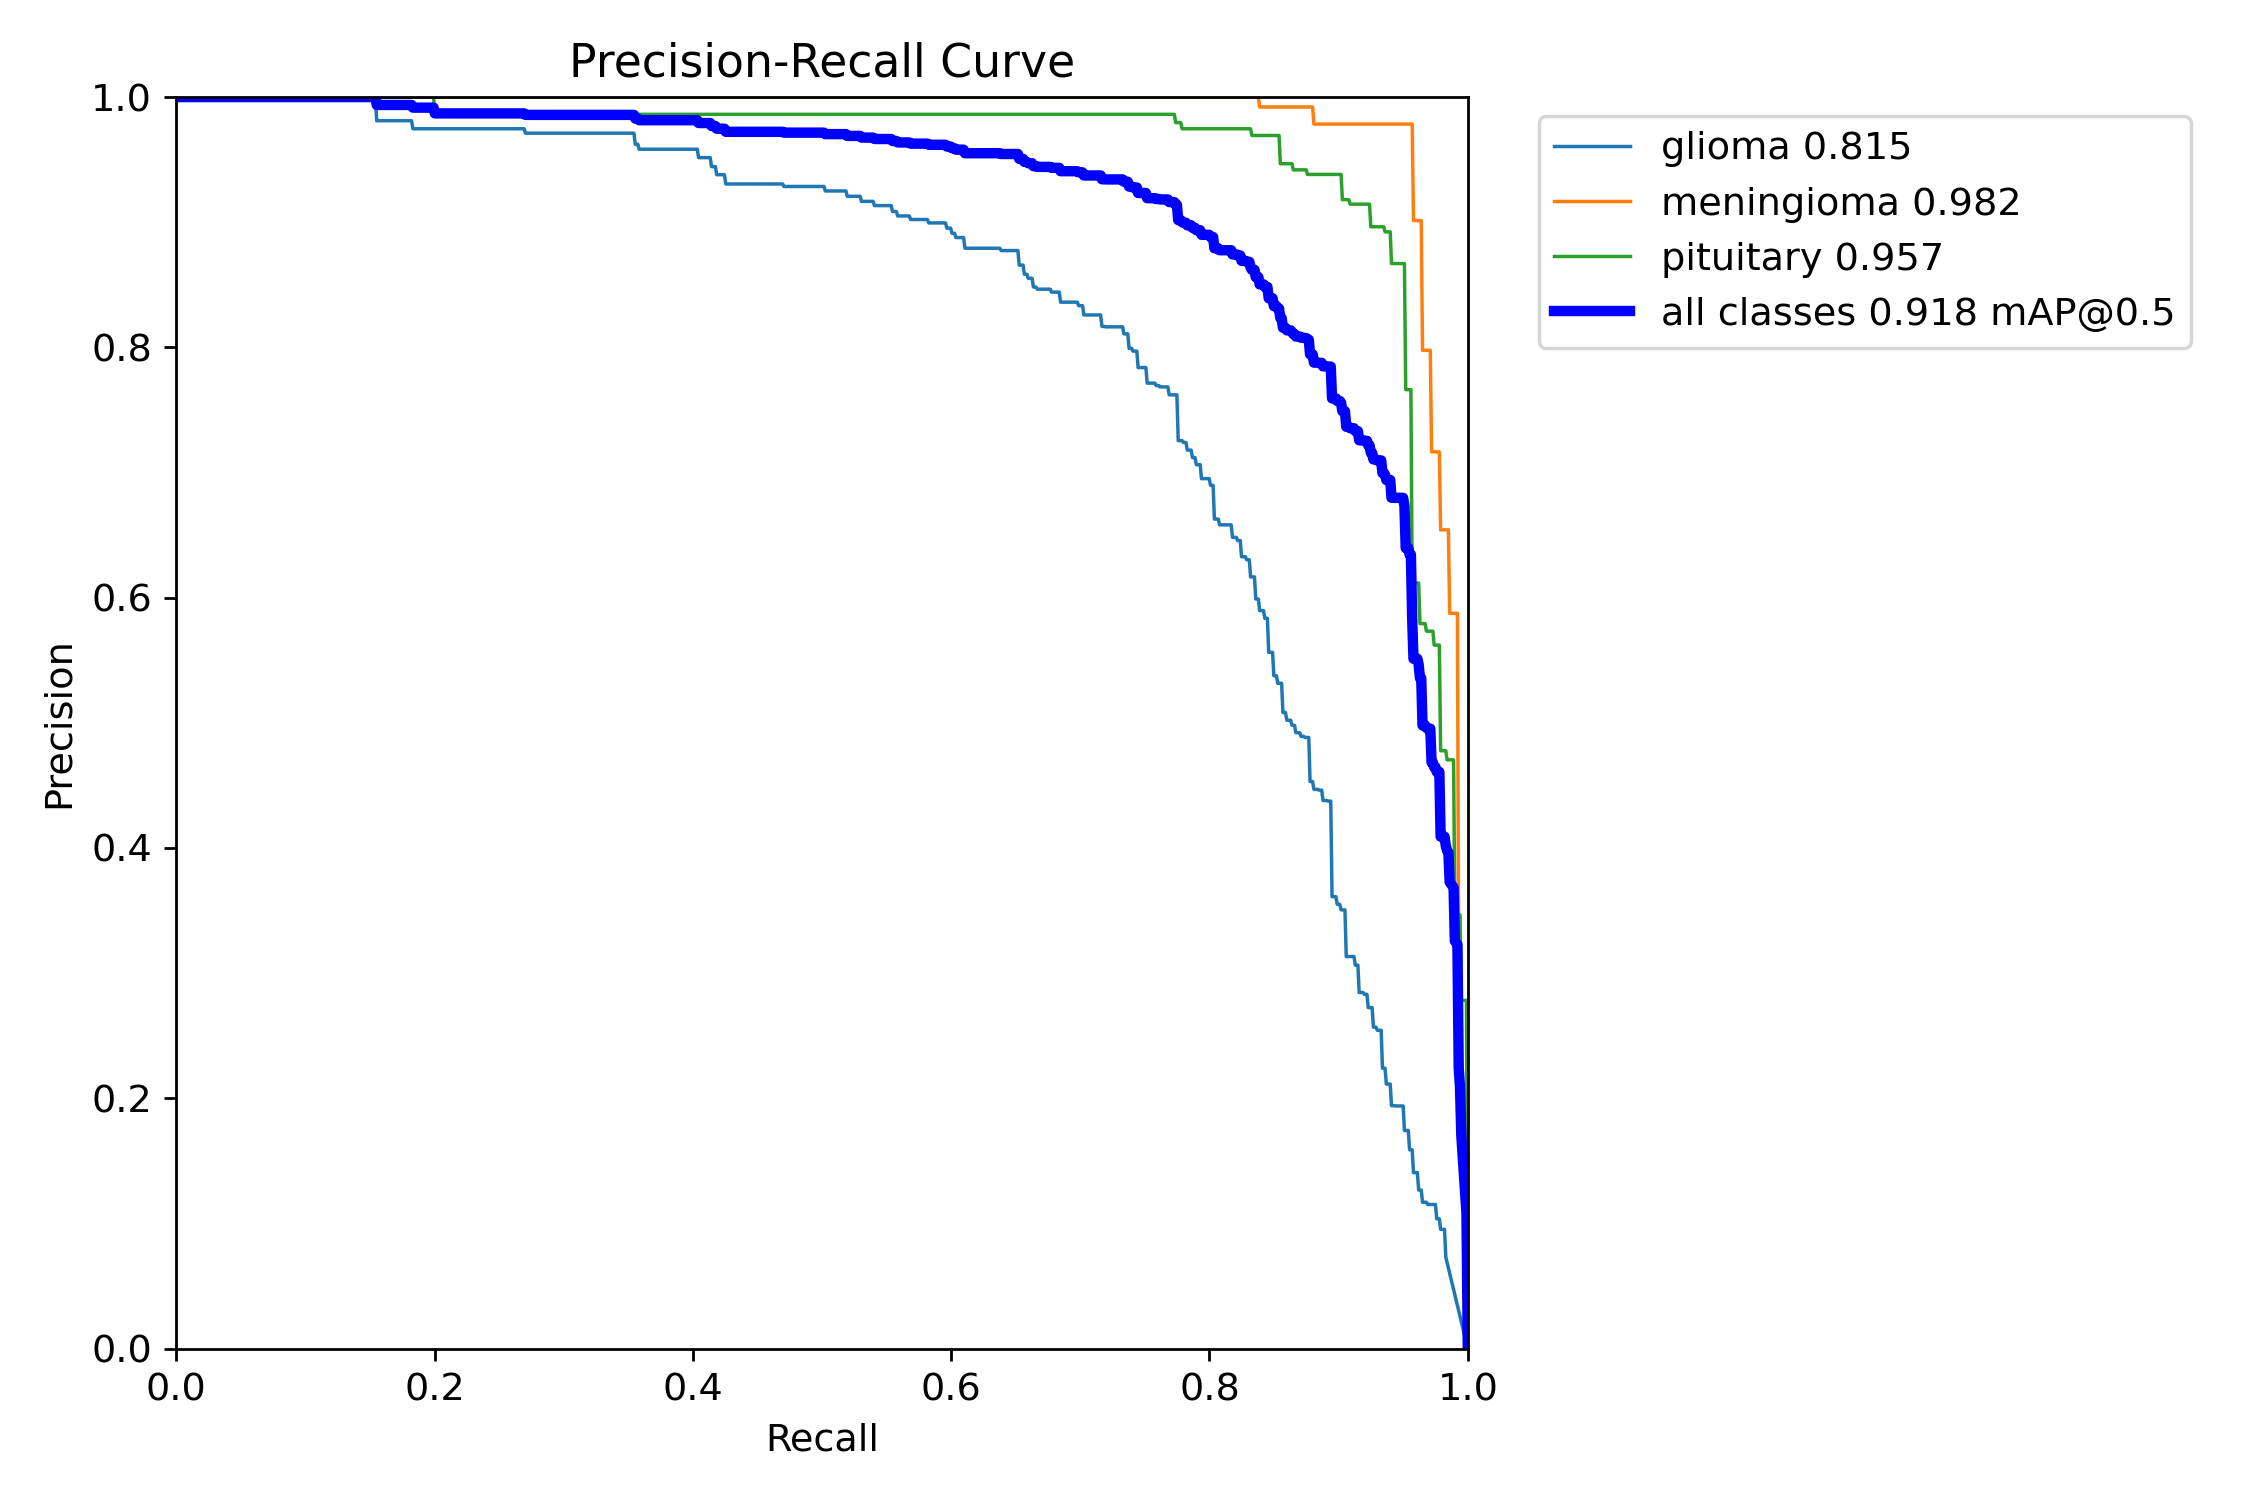

In [16]:
# 6.3 Precision-Recall (PR) Curve
pr_curve_path = glob.glob(os.path.join(results_dir, '*PR_curve.png'))
if pr_curve_path:
    print("\n📈 Precision-Recall (PR) Curve")
    display(Image(filename=pr_curve_path[0], width=800))


 Sample Predictions from Validation


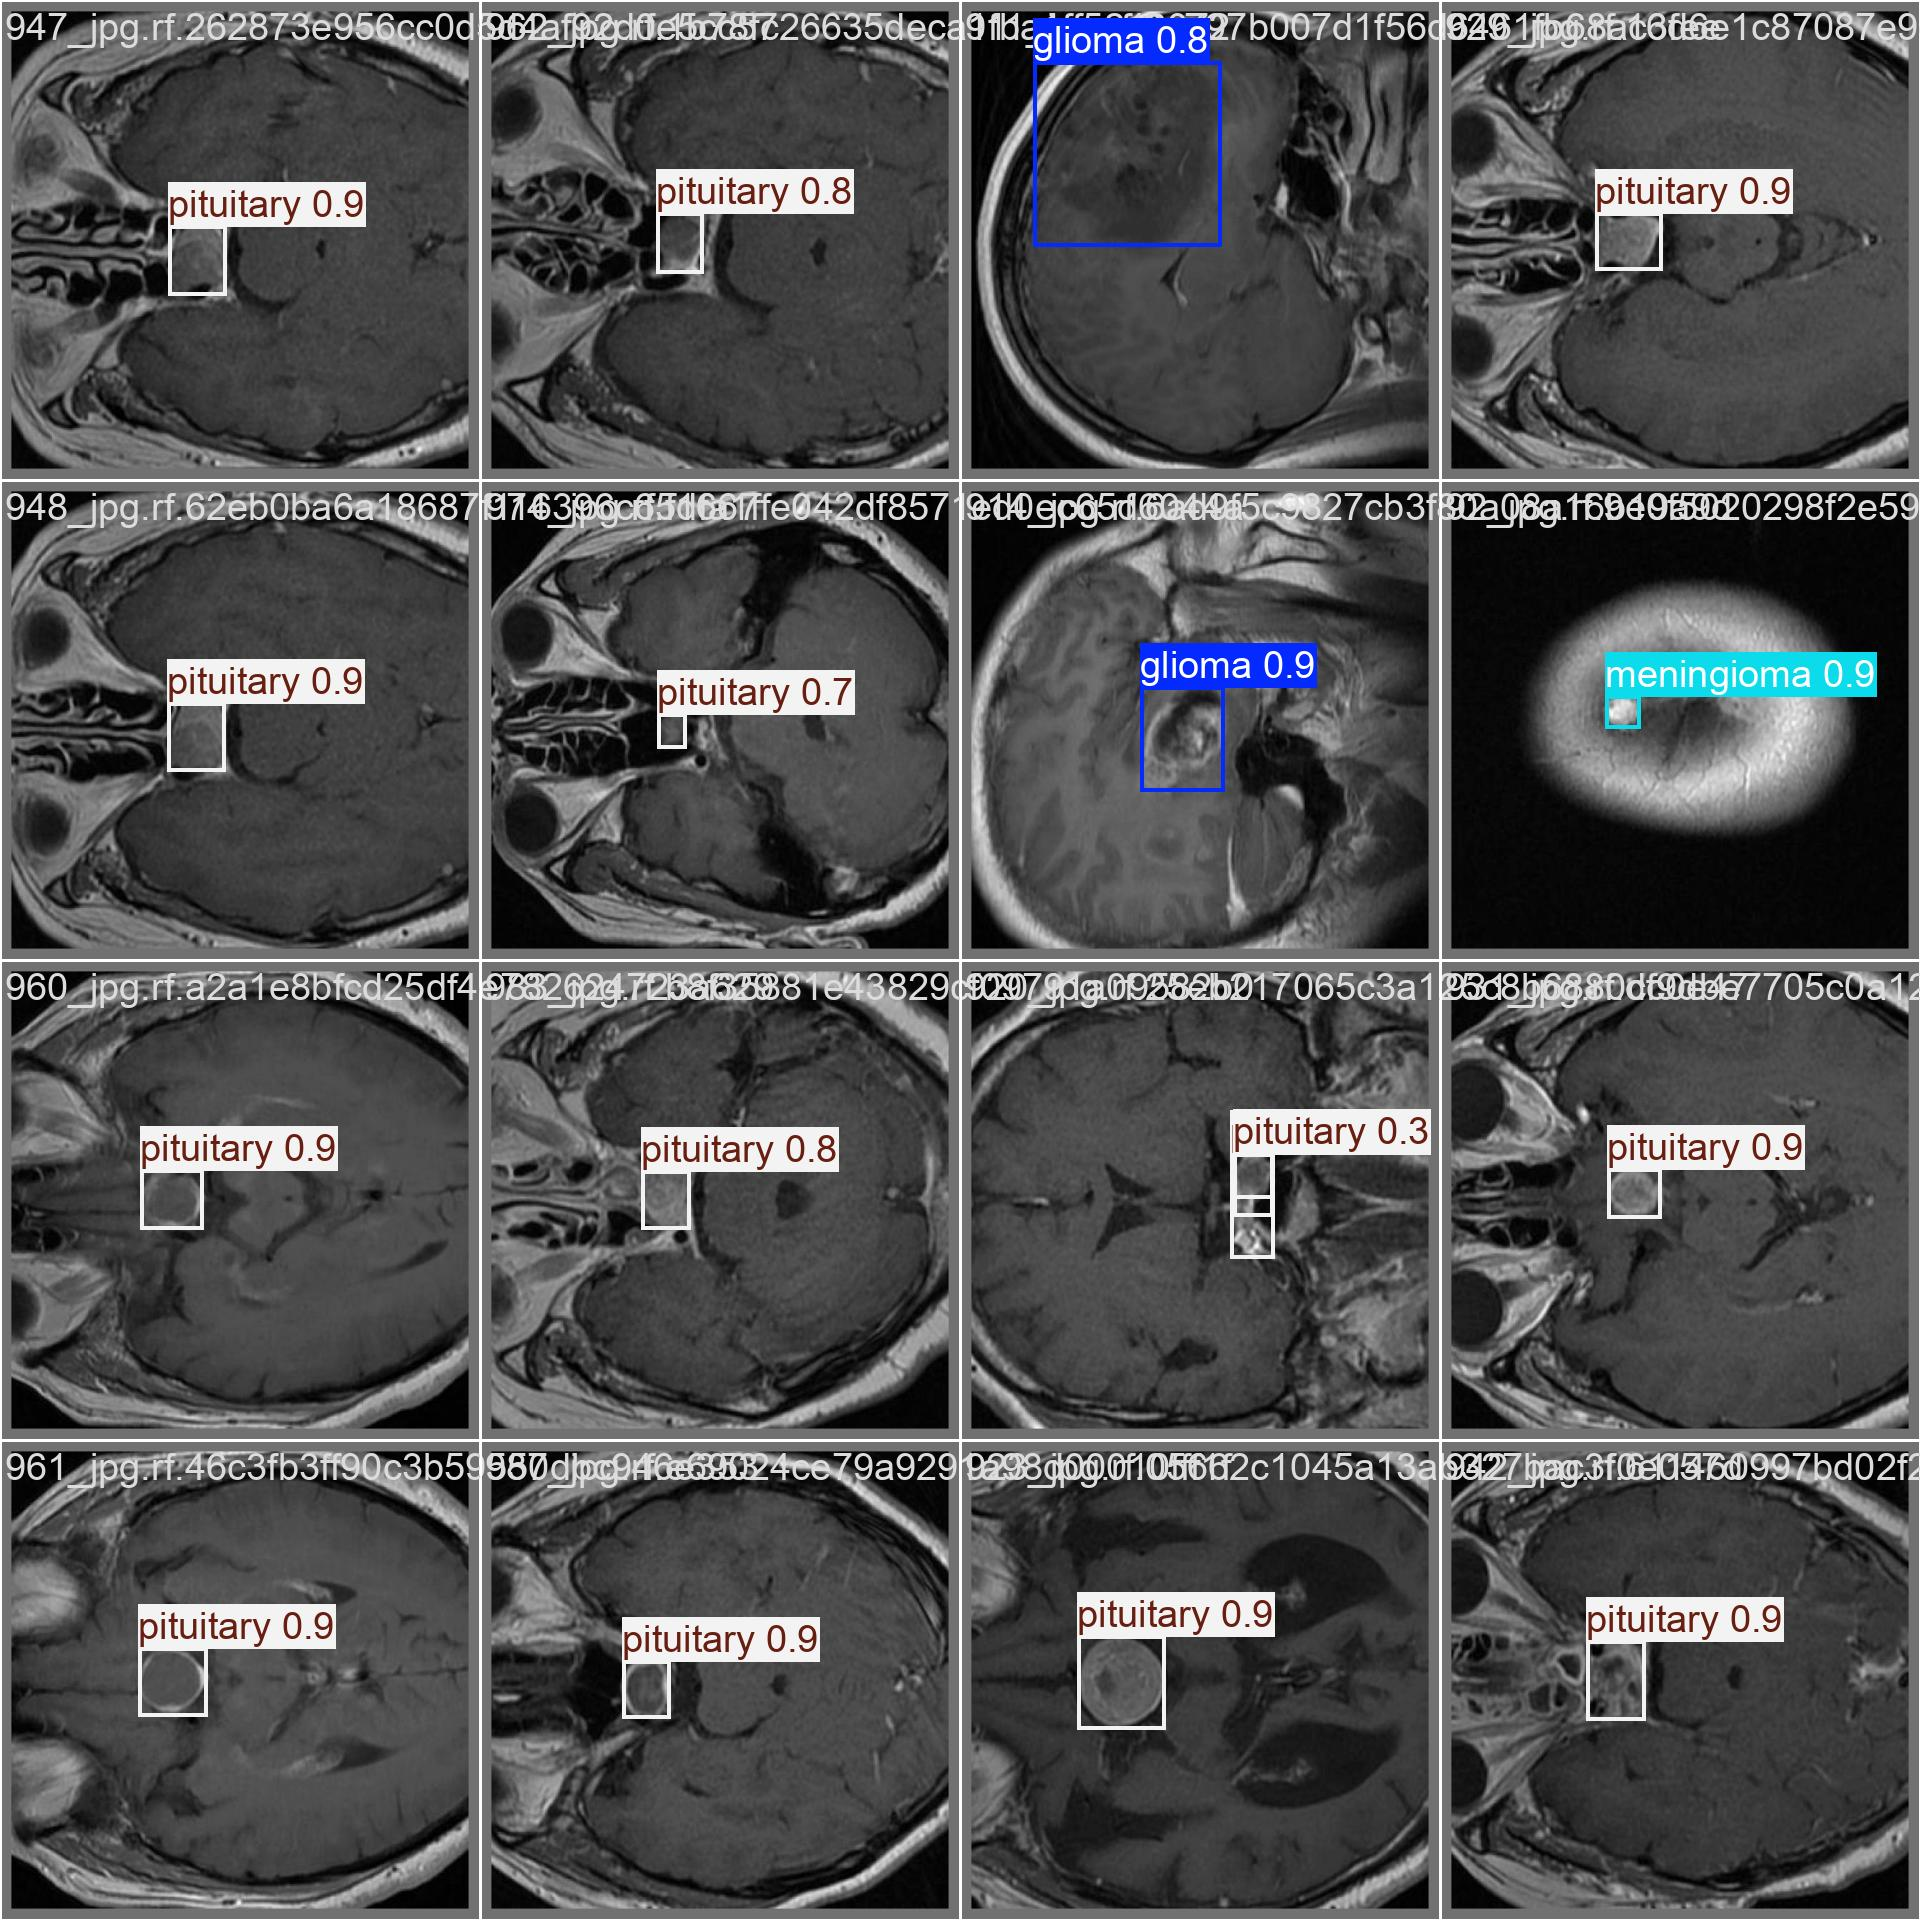

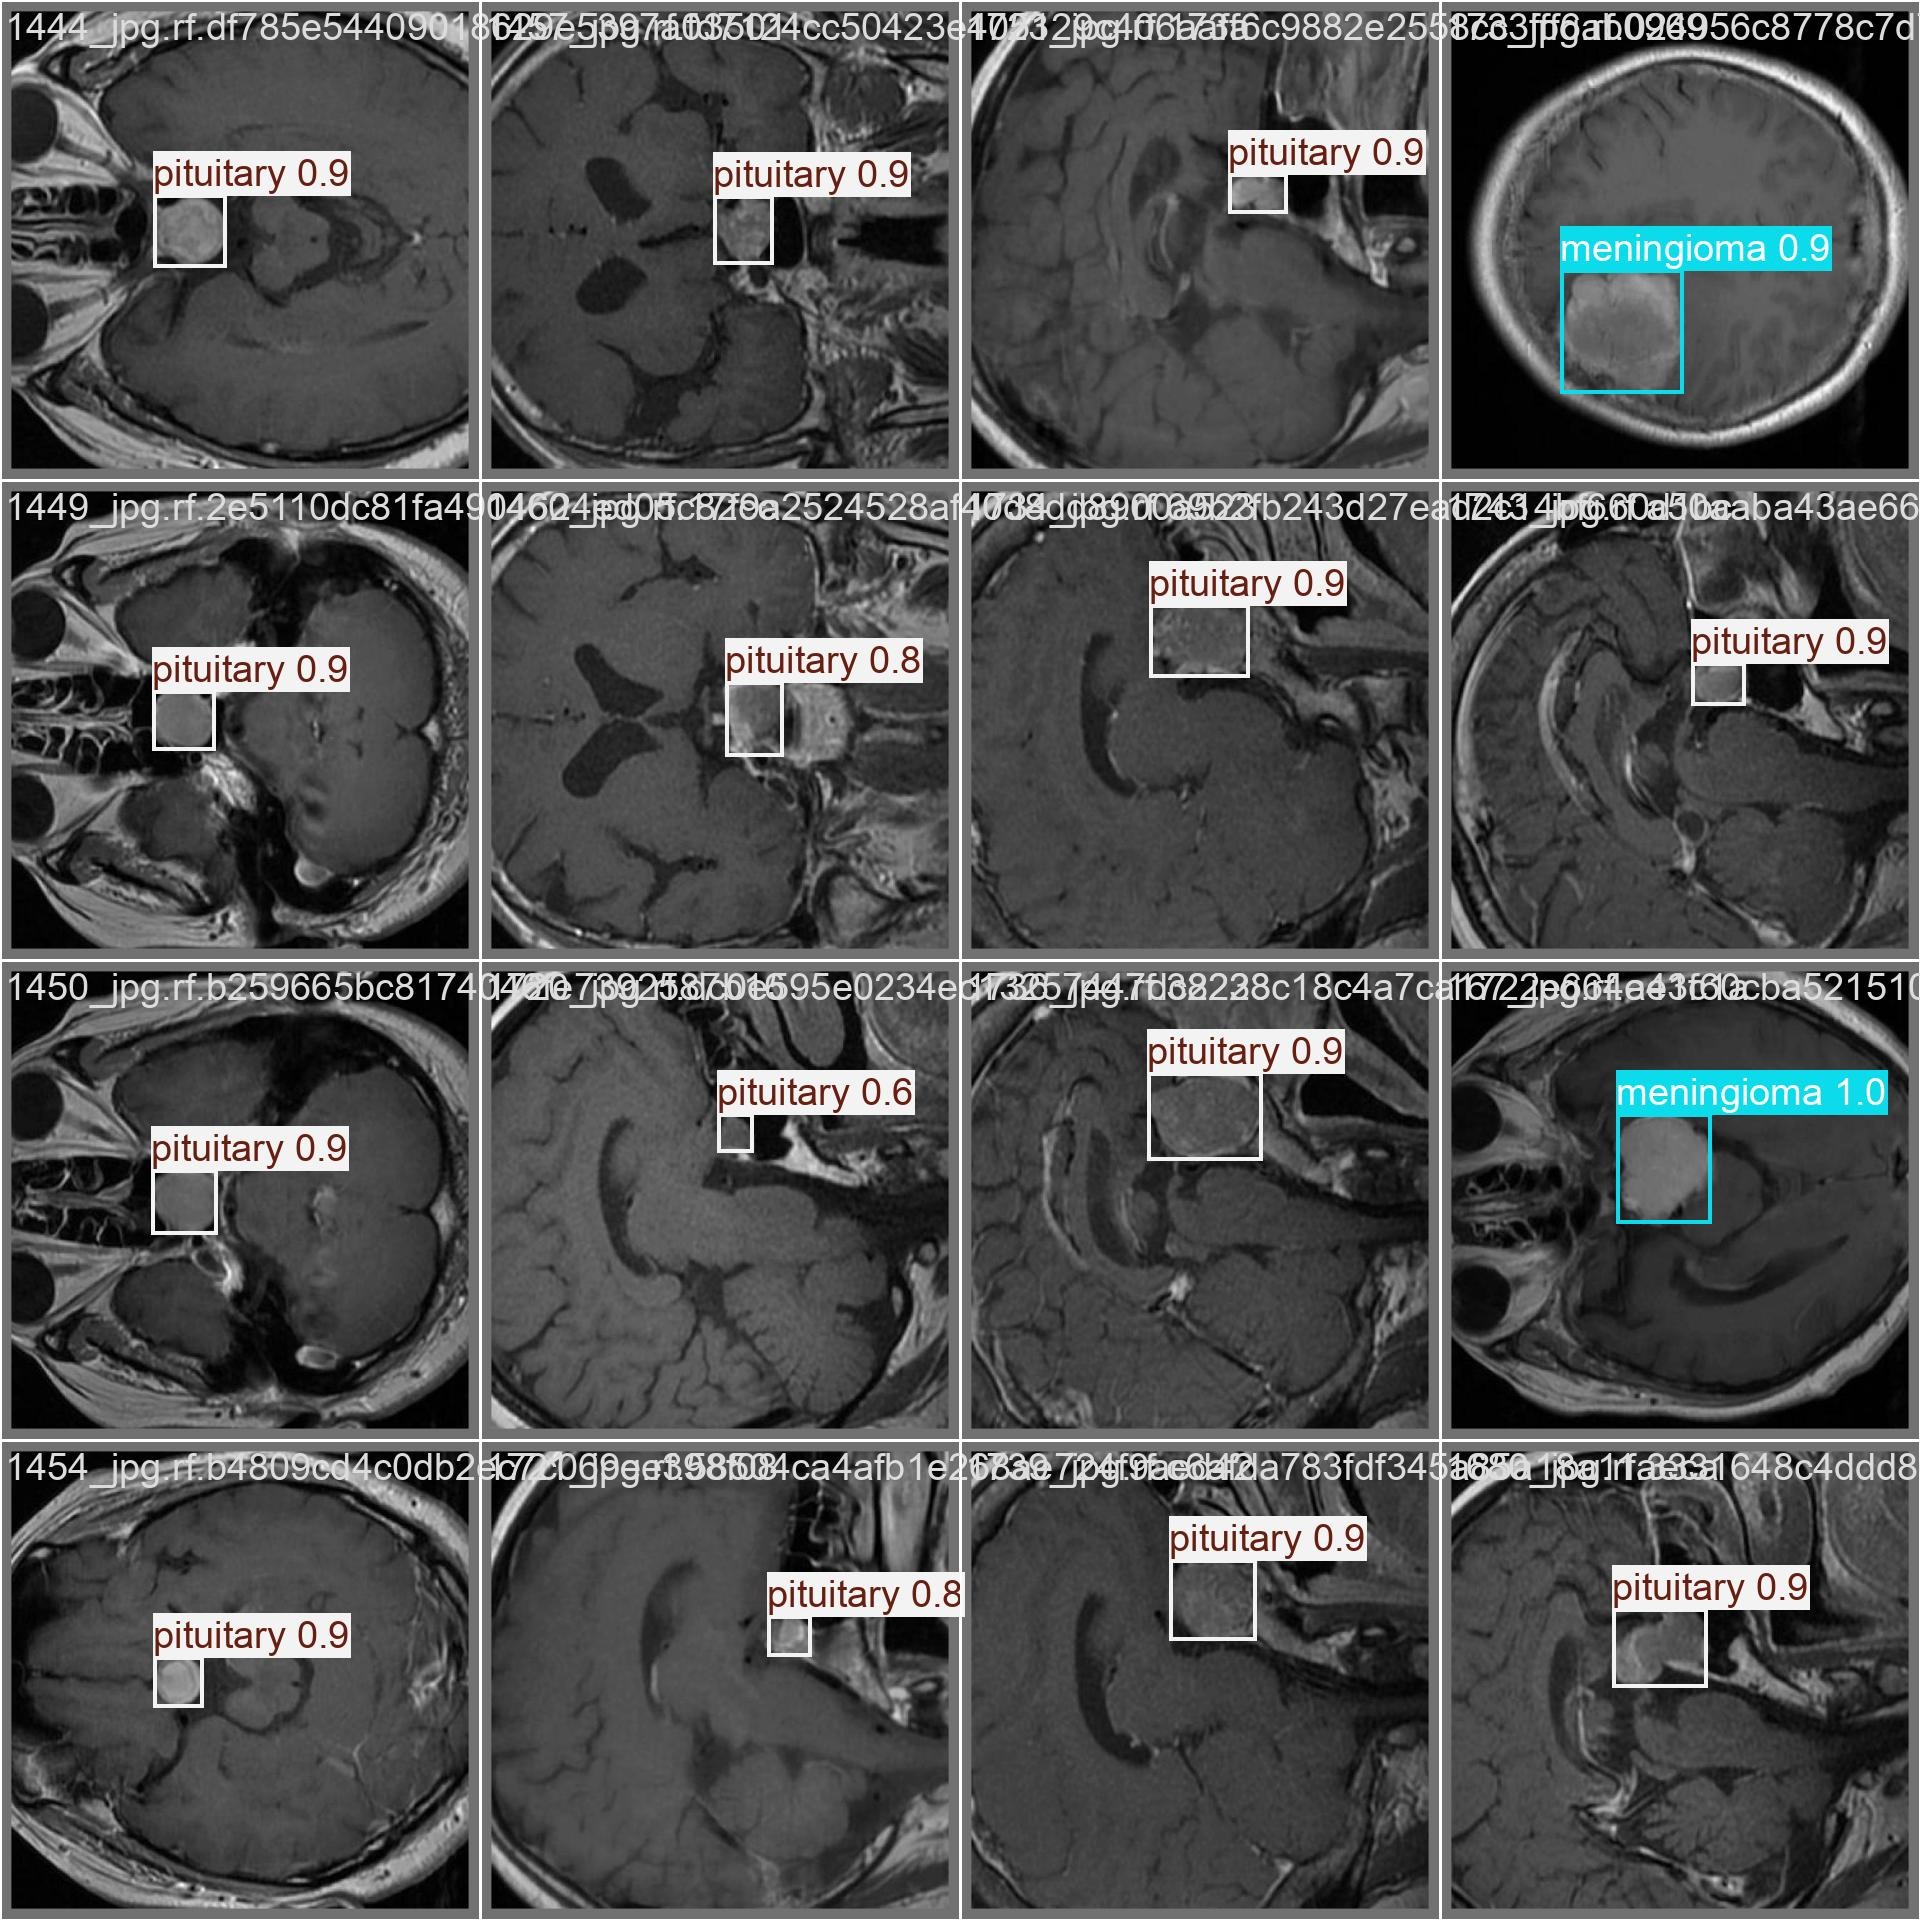

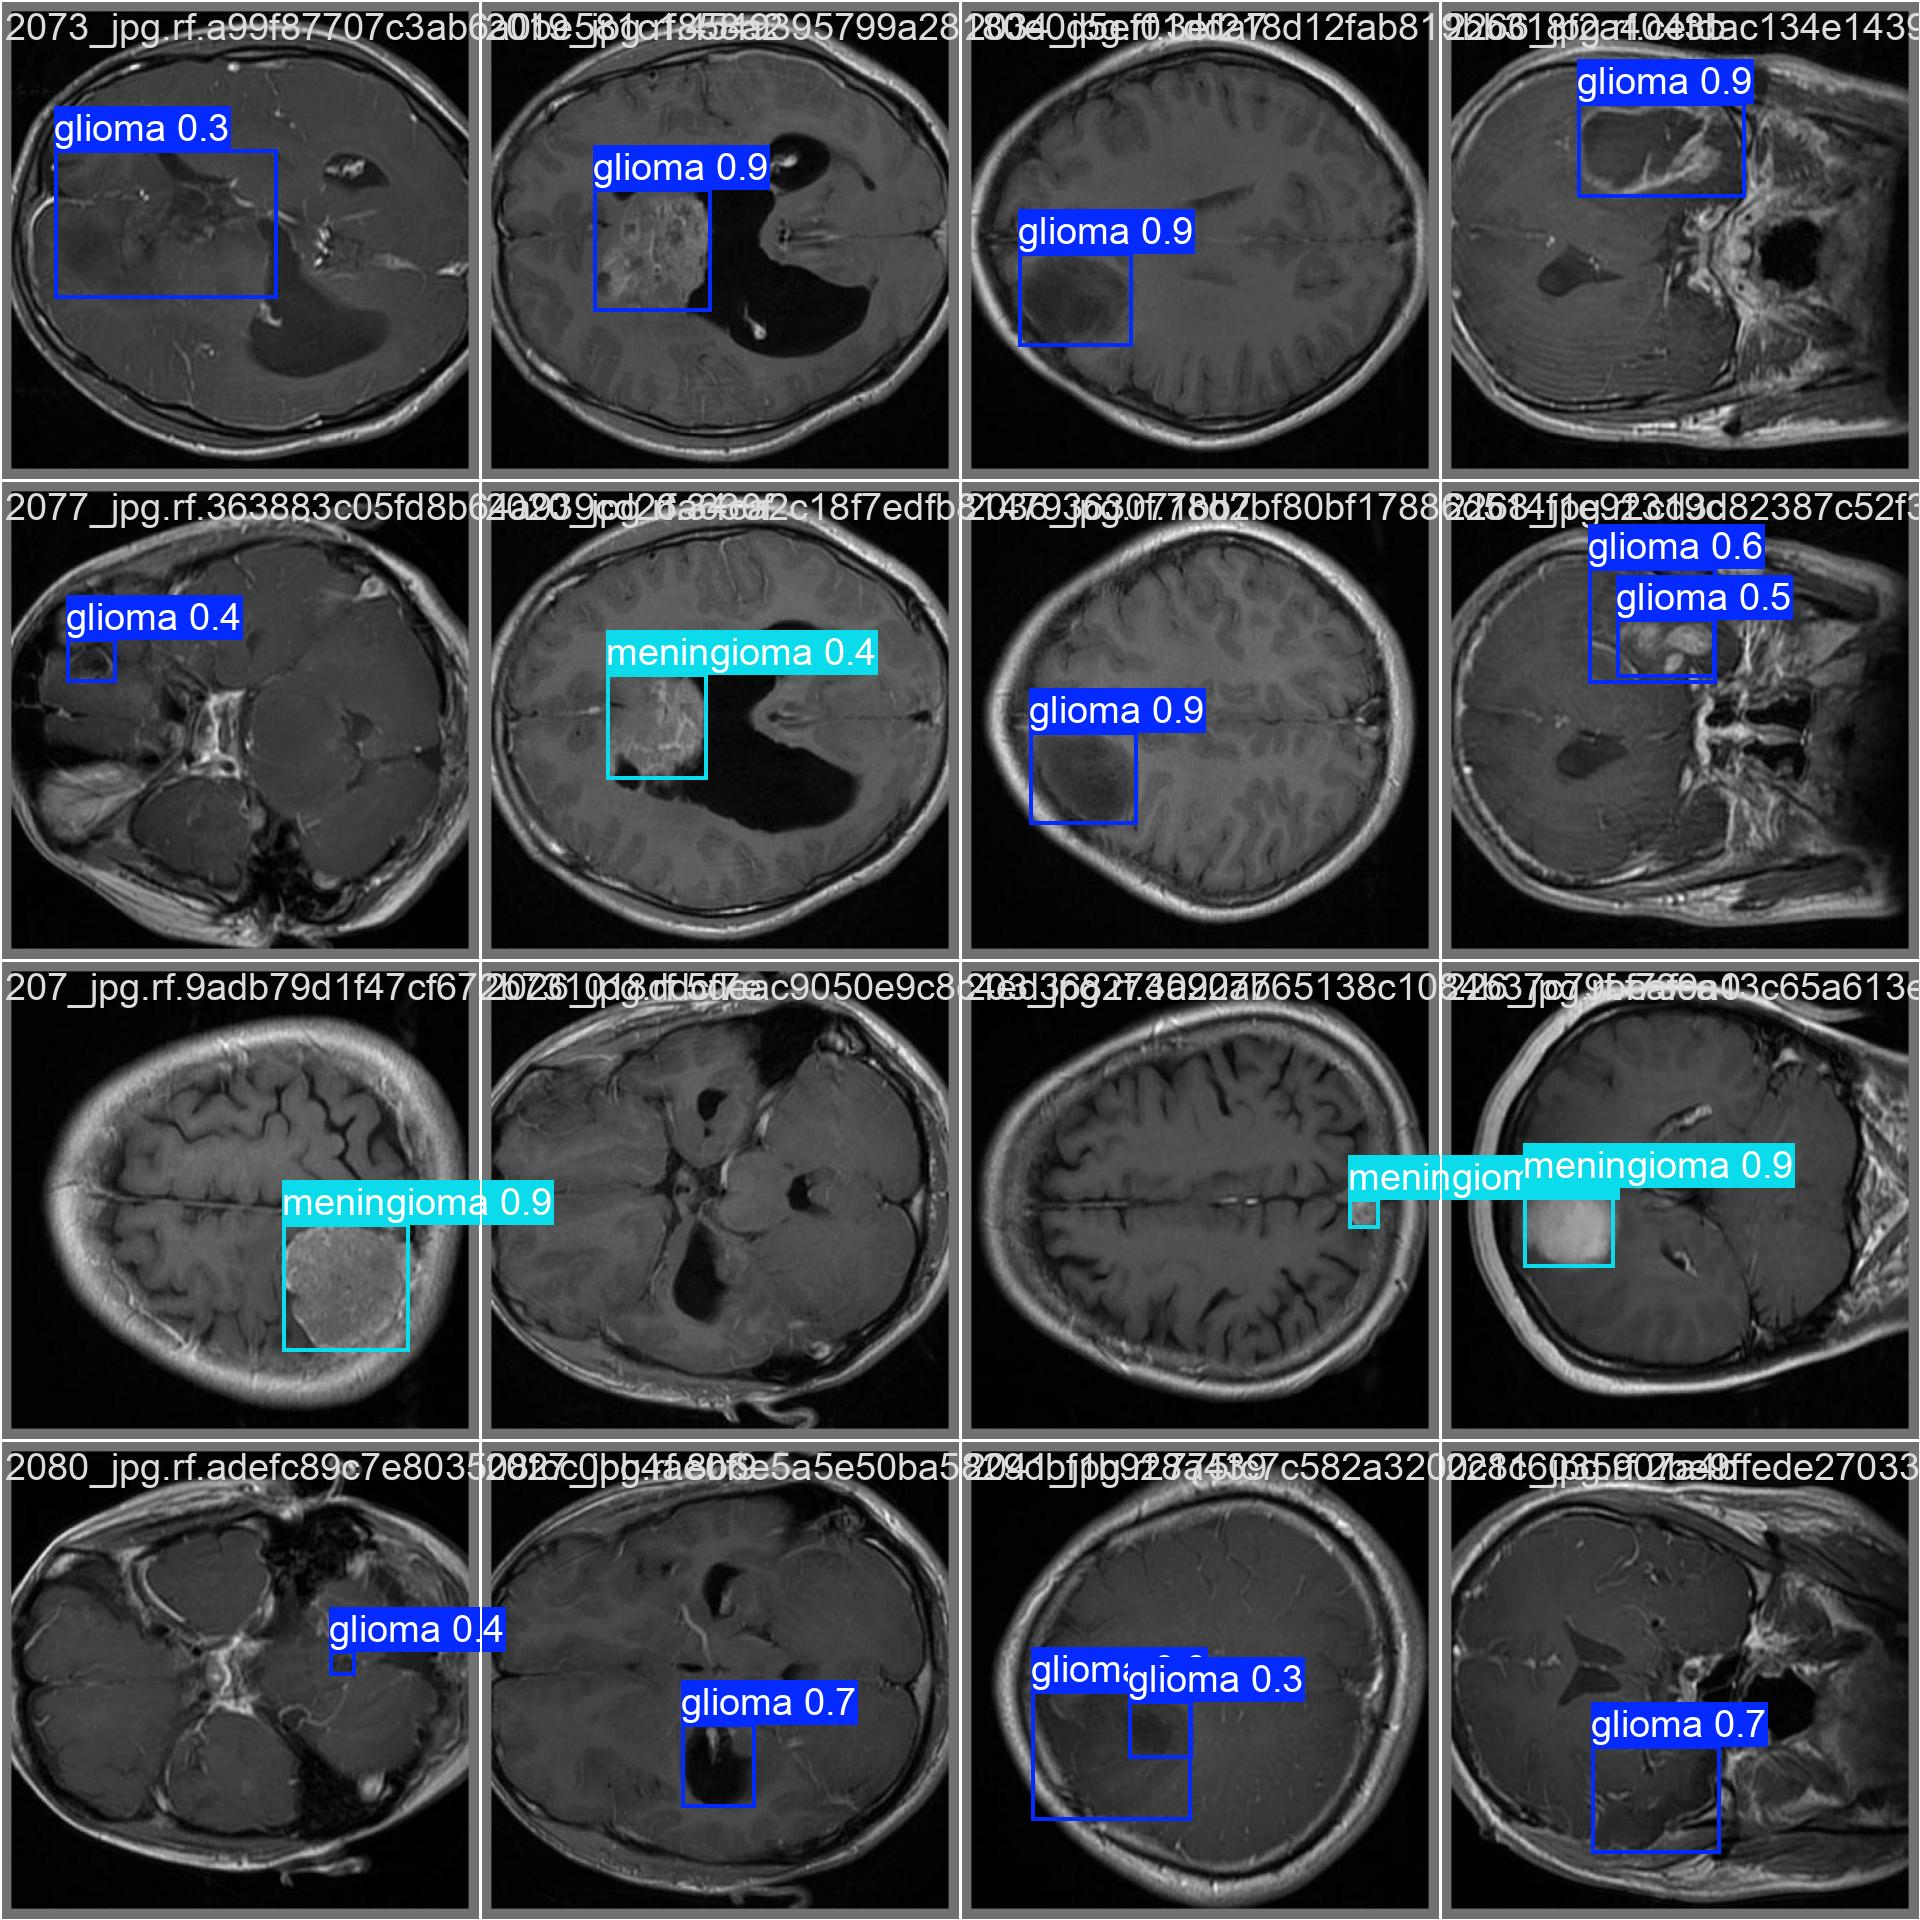

In [18]:
# 6.4 Qualitative Results (Validation Batch Images)
print("\n Sample Predictions from Validation")
val_batch_images = glob.glob(os.path.join(results_dir, 'val_batch*_pred.jpg'))
if val_batch_images:
    for img_path in sorted(val_batch_images)[:3]: # Display first 3 batches
        display(Image(filename=img_path))